## Real Estate Price Analysis in Python

In [372]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/houses.csv')

### Data exploration:
- first 5 rows
- data overview
- data info

In [373]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [374]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [376]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [377]:
# Check for missing values
print(df.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [378]:
from scipy import stats
df = df[df["price"] > 0]  # Remove unrealistic values
# Remove outliers using z-score
z_scores = stats.zscore(df["price"])
df = df[(z_scores < 3)]


In [379]:
top_cities = df["city"].value_counts().nlargest(5).index  # Keep only the top 5 cities
df["city"] = df["city"].apply(lambda x: x if x in top_cities else "Other")

In [380]:
# Add a new column with the total square footage of the house
df["square_footage"] = df["sqft_living"] + df["sqft_above"] + df["sqft_basement"]

Histogram for Distrobution of House Prices

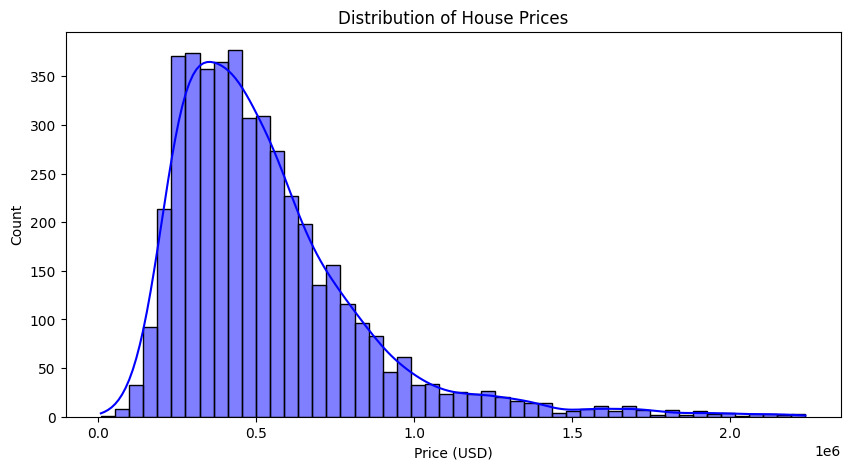

In [381]:
# Create a figure with a specific size
plt.figure(figsize=(10,5))

# Plot a histogram of the house prices
sns.histplot(df["price"], bins=50, kde=True, color="blue")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.title("Distribution of House Prices")
plt.show()

Price vs. Square Footage

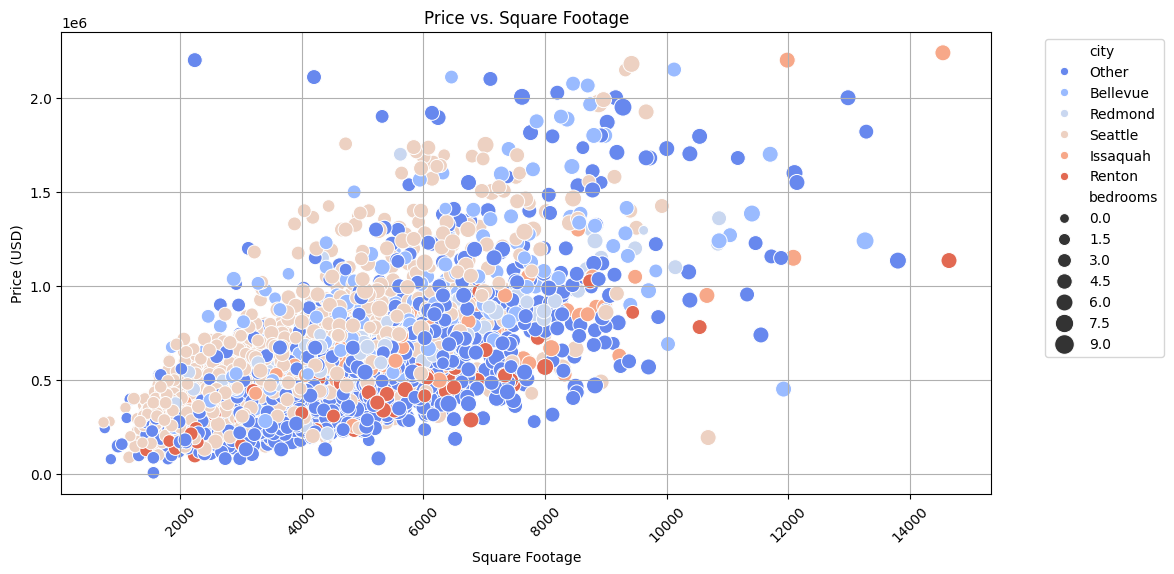

In [382]:
# Visualise house price vs square footage
plt.figure(figsize=(12,6))  # Wider plot than before
sns.scatterplot(data=df, x="square_footage", y="price", hue="city", size="bedrooms", sizes=(50, 200), palette="coolwarm")
plt.xlabel("Square Footage")
plt.ylabel("Price (USD)")
plt.title("Price vs. Square Footage")
plt.xticks(rotation=45)  # Rotate x-axis if needed
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside the plot
plt.grid(True)
plt.show()


Most Expensive House Locations

/var/folders/f1/p4cf4cmd4p16g82_wbklt_000000gn/T/ipykernel_2319/2923024567.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette="coolwarm")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = gr

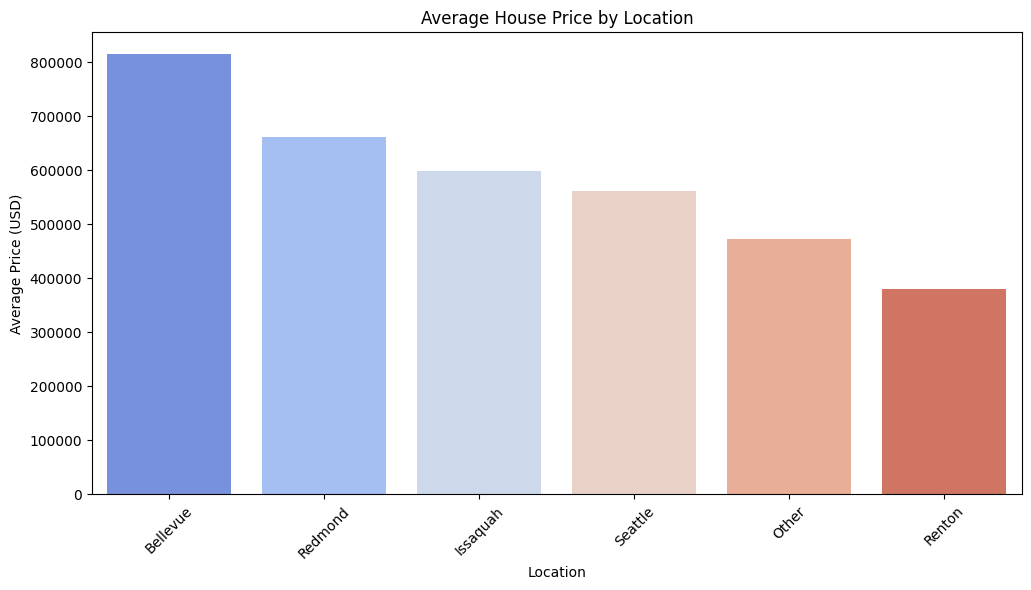

In [383]:
avg_price = df.groupby("city")["price"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=avg_price.index, y=avg_price.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Average Price (USD)")
plt.title("Average House Price by Location")
plt.show()

Correlations

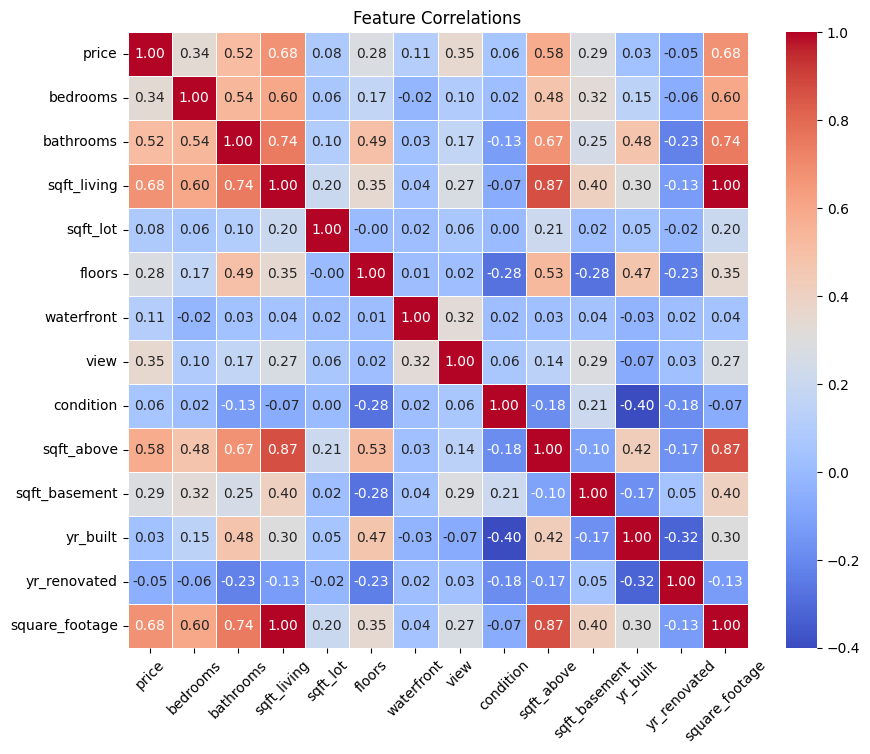

In [384]:
# Select only numeric columns so that we can calculate the correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.xticks(rotation=45)
plt.title("Feature Correlations")
plt.show()

Part 2: Modelling

Epoch [50/500], Loss: 0.174253, Val Loss: 0.170117
Epoch [100/500], Loss: 0.167540, Val Loss: 0.164192
Epoch [150/500], Loss: 0.164869, Val Loss: 0.161410
Epoch [200/500], Loss: 0.163561, Val Loss: 0.160148
Epoch [250/500], Loss: 0.162696, Val Loss: 0.159412
Epoch [300/500], Loss: 0.161983, Val Loss: 0.158993
Epoch [350/500], Loss: 0.161657, Val Loss: 0.158928
Epoch [400/500], Loss: 0.161329, Val Loss: 0.158805
Epoch [450/500], Loss: 0.161022, Val Loss: 0.158731
Epoch [500/500], Loss: 0.160868, Val Loss: 0.158698
Final Mean Absolute Error: $278.97


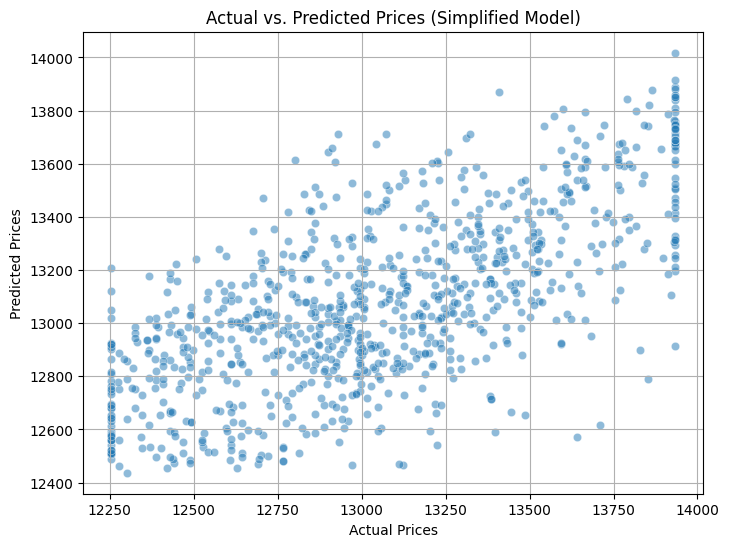

In [385]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (assuming df is your dataframe)
df = df.copy()  # Ensure we don't modify the original dataframe

# Select features and target
features = ["square_footage", "bedrooms", "bathrooms", "floors"]
target = "price"

X = df[features].values
y = df[target].values.reshape(-1, 1)  # Ensure y is 2D

# Outlier removal & log transformation
y = np.clip(y, a_min=np.percentile(y, 5), a_max=np.percentile(y, 95))  # Remove outliers
y = np.log1p(y)  # Log transformation for price normalization

# Feature scaling using RobustScaler for less sensitivity to outliers
scaler_X = RobustScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).squeeze()
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).squeeze()

# Simplified Model Definition
class SimplifiedHousePriceModel(nn.Module):
    def __init__(self):
        super(SimplifiedHousePriceModel, self).__init__()
        self.fc1 = nn.Linear(4, 128)  # Fewer neurons
        self.fc2 = nn.Linear(128, 1)  # Output layer

        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)  # No activation (regression)
        return x

# Model initialization and optimizer
model = SimplifiedHousePriceModel()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.001)  # Adjusted learning rate
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=150, gamma=0.5)

# Train the simplified model with early stopping
def train_model_with_early_stopping(model, X_train, y_train, X_val, y_val, num_epochs=500, patience=30):
    best_loss = float('inf')
    epochs_without_improvement = 0

    for epoch in range(num_epochs):
        model.train()
        y_pred_train = model(X_train).squeeze()
        loss = nn.L1Loss()(y_pred_train, y_train)

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        scheduler.step()

        # Validation loss
        model.eval()
        y_pred_val = model(X_val).squeeze()
        val_loss = nn.L1Loss()(y_pred_val, y_val)

        if val_loss < best_loss:
            best_loss = val_loss
            epochs_without_improvement = 0  # Reset counter
        else:
            epochs_without_improvement += 1

        if epochs_without_improvement >= patience:
            print(f"Early stopping after {epoch+1} epochs.")
            break

        if (epoch + 1) % 50 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}, Val Loss: {val_loss.item():.6f}")

# Split training data for validation
X_train_tensor, X_val_tensor, y_train_tensor, y_val_tensor = train_test_split(X_train_tensor, y_train_tensor, test_size=0.2, random_state=42)

train_model_with_early_stopping(model, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, num_epochs=500, patience=30)

# Evaluate model
model.eval()
y_pred_test = model(X_test_tensor).detach().numpy()
y_pred_test = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1)) * 1000  # Convert back
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)) * 1000

# Compute MAE
mae = np.mean(np.abs(y_pred_test - y_test))
print(f"Final Mean Absolute Error: ${mae:.2f}")

# Plot actual vs predicted prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.flatten(), y=y_pred_test.flatten(), alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (Simplified Model)")
plt.grid(True)
plt.show()

